In [4]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from numbers import Number
from scipy import stats

We will calculate the percentage for missing data in 3 categories: secondary applicants, hardship, debt-settlement; Then we will analysis if the default rate will change a lot conditionally on those categories. 

In [5]:
LARGE_FILE = "D:\Study_UIUC\practicum\loan_data_complete.csv"
CHUNKSIZE = 100000 # processing 100,000 rows at a time
'''
def process_frame(df):
        # process data frame
        return len(df)

if __name__ == '__main__':
        reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE)

        result = 0
        for df in reader:
                # process each data frame
                result += process_frame(df)

        print("There are %d rows of data"%(result))
'''

'\ndef process_frame(df):\n        # process data frame\n        return len(df)\n\nif __name__ == \'__main__\':\n        reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE)\n\n        result = 0\n        for df in reader:\n                # process each data frame\n                result += process_frame(df)\n\n        print("There are %d rows of data"%(result))\n'

In [6]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
loan_data1 = pd.DataFrame()
loan_data2 = pd.DataFrame()
loan_data3 = pd.DataFrame()
loan_data4 = pd.DataFrame()
loan_data5 = pd.DataFrame()
loan_data6 = pd.DataFrame()
loan_data7 = pd.DataFrame()
loan_data8 = pd.DataFrame()
loan_data9 = pd.DataFrame()
frames1 = []
frames2 = []
frames3 = []
frames4 = []
frames5 = []
frames6 = []
frames7 = []
frames8 = []
frames9 = []

We firstly count how many "current", "charged off", "fully paid", "in grace period", "late(16-30 days)", "late(31-120days)","Does not meet the credit policy. Status:Fully Paid", "Does not meet the credit policy. Status:Fully Paid", "Default"

In [7]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames1.append(df[df["loan_status"] == "Fully Paid"])
loan_data1 = pd.concat(frames1)

In [8]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames2.append(df[df["loan_status"] == "Does not meet the credit policy. Status:Fully Paid"])
loan_data2 = pd.concat(frames2)

In [9]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames3.append(df[df["loan_status"] == "Does not meet the credit policy. Status:Charged Off"])
loan_data3 = pd.concat(frames3)

In [10]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames4.append(df[df["loan_status"] == "In Grace Period"])
loan_data4 = pd.concat(frames4)

In [11]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames5.append(df[df["loan_status"] == "Late (16-30 days)"])
loan_data5 = pd.concat(frames5)

In [12]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames6.append(df[df["loan_status"] == "Late (31-120 days)"])
loan_data6 = pd.concat(frames6)

In [13]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames7.append(df[df["loan_status"] == "Default"])
loan_data7 = pd.concat(frames7)

In [14]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames8.append(df[df["loan_status"] == "Charged Off"])
loan_data8 = pd.concat(frames8)

In [15]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
for df in reader:
    frames9.append(df[df["loan_status"] == "Current"])
loan_data9 = pd.concat(frames9)

Below are percentage for the distribution of all types in the column "loan_status"

In [35]:
print len(loan_data1), len(loan_data2), len(loan_data3), len(loan_data4), len(loan_data5), len(loan_data6),
print len(loan_data7), len(loan_data8), len(loan_data9)
print "fully paid",len(loan_data1)/1646801.0
print "Does not meet the credit policy. Status:Fully Paid",len(loan_data2)/1646801.0 
print "Does not meet the credit policy. Status:Charged Off",len(loan_data3)/1646801.0
print "in grace period", len(loan_data4)/1646801.0 
print "late30",len(loan_data5)/1646801.0
print "late120",len(loan_data6)/1646801.0
print "default",len(loan_data7)/1646801.0
print "charged off",len(loan_data8)/1646801.0
print "current",len(loan_data9)/1646801.0

669845 1988 761 11312 5293 21843 119 175057 760560
fully paid 0.406755278871
Does not meet the credit policy. Status:Fully Paid 0.00120718896819
Does not meet the credit policy. Status:Charged Off 0.0004621080507
in grace period 0.0068690752556
late30 0.0032141102659
late120 0.0132638977023
default 7.2261311476e-05
charged off 0.106301247084
current 0.461840866018


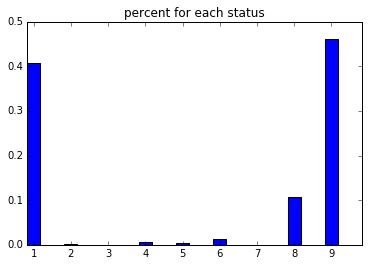

In [36]:
pct_loan_status = (len(loan_data1)/1646801.0, len(loan_data2)/1646801.0 , len(loan_data3)/1646801.0,len(loan_data4)/1646801.0 ,
                   len(loan_data5)/1646801.0, len(loan_data6)/1646801.0 , len(loan_data7)/1646801.0,len(loan_data8)/1646801.0,
                   len(loan_data9)/1646801.0)
width = 0.35
ind = np.arange(9)
fig,ax = plt.subplots()
rect = ax.bar(ind, pct_loan_status, width, color='b')
ax.set_title('percent for each status')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))

In order to see how many people are in hardship, we count that with columns don't have missing data

In [25]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
data1 = pd.DataFrame()
frame_hardship = []

In [26]:
for df in reader:
    frame_hardship.append(df[df["deferral_term"] >= 0])
data1 = pd.concat(frame_hardship)

In [27]:
data_with_hardship = len(data1)

6125
pct for charged off:
0.112489795918
0.0290612244898
0.0
0.0
0.0595918367347
0.0502857142857
0.242775510204
0.0151836734694
0.112489795918
0.490612244898


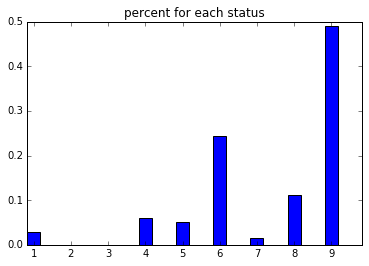

In [28]:
print data_with_hardship
count_current = 0;
count_chargeoff = 0;
count_fullypaid = 0;
count_late30 = 0;
count_late120 = 0;
count_grace = 0;
count_default = 0;
count_charged_policy = 0;
count_fully_policy = 0;

for val in data1["loan_status"]:
    if val == "Current":
        count_current += 1;
    if val == "Fully Paid":
        count_fullypaid += 1;
    if val == "Charged Off":
        count_chargeoff += 1;
    if val == "In Grace Period":
        count_grace += 1;
    if val == "Late (16-30 days)":
        count_late30 += 1;
    if val == "Late (31-120 days)":
        count_late120 += 1;
    if val == "Default":
        count_default += 1;
    if val == "Does not meet the credit policy. Status:Charged Off":
        count_charged_policy += 1;
    if val == "Does not meet the credit policy. Status:Fully Paid":
        count_fully_policy += 1;
print "pct for charged off:"
print count_chargeoff/(float(data_with_hardship))
pct = (count_fullypaid/(float(data_with_hardship)),
       count_fully_policy/(float(data_with_hardship)),
       count_charged_policy/(float(data_with_hardship)),
       count_grace/(float(data_with_hardship)),
       count_late30/(float(data_with_hardship)),
       count_late120/(float(data_with_hardship)),
       count_default/(float(data_with_hardship)),
       count_chargeoff/(float(data_with_hardship)),
       count_current/(float(data_with_hardship))) 
for i in pct:
    print i
width = 0.35
ind = np.arange(9)
fig,ax = plt.subplots()
rect = ax.bar(ind, pct, width, color='b')
ax.set_title('percent for each status')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))

In [41]:
pct_hardship = data_with_hardship / 1646801.0
print pct_hardship


0.00371933220832


We can see that nearly all applicants are not in hardship. And it also means that there will be a huge amount of missing data in following columns!

In [29]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
frame_debt_settlement_flag = [];
data2 = pd.DataFrame()

In [30]:
for df in reader:
    frame_debt_settlement_flag.append(df[df["settlement_amount"] >= 0])
data2 = pd.concat(frame_debt_settlement_flag)

pct for charged off:
0.953382949932
6.76589986468e-05
0.0
0.000676589986468
0.00108254397835
0.00121786197564
0.040798376184
0.000541271989175
0.953382949932
0.00223274695535


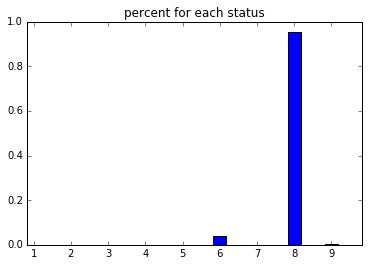

In [31]:
data_with_debt_settlement = len(data2)
count_current = 0;
count_chargeoff = 0;
count_fullypaid = 0;
count_late30 = 0;
count_late120 = 0;
count_grace = 0;
count_default = 0;
count_charged_policy = 0;
count_fully_policy = 0;

for val in data2["loan_status"]:
    if val == "Current":
        count_current += 1;
    if val == "Fully Paid":
        count_fullypaid += 1;
    if val == "Charged Off":
        count_chargeoff += 1;
    if val == "In Grace Period":
        count_grace += 1;
    if val == "Late (16-30 days)":
        count_late30 += 1;
    if val == "Late (31-120 days)":
        count_late120 += 1;
    if val == "Default":
        count_default += 1;
    if val == "Does not meet the credit policy. Status:Charged Off":
        count_charged_policy += 1;
    if val == "Does not meet the credit policy. Status:Fully Paid":
        count_fully_policy += 1;
print "pct for charged off:"
print count_chargeoff/(float(data_with_debt_settlement))
pct = (count_fullypaid/(float(data_with_debt_settlement)),
       count_fully_policy/(float(data_with_debt_settlement)),
       count_charged_policy/(float(data_with_debt_settlement)),
       count_grace/(float(data_with_debt_settlement)),
       count_late30/(float(data_with_debt_settlement)),
       count_late120/(float(data_with_debt_settlement)),
       count_default/(float(data_with_debt_settlement)),
       count_chargeoff/(float(data_with_debt_settlement)),
       count_current/(float(data_with_debt_settlement))) 
for i in pct:
    print i
width = 0.35
ind = np.arange(9)
fig,ax = plt.subplots()
rect = ax.bar(ind, pct, width, color='b')
ax.set_title('percent for each status')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))

In [47]:
pct_debt_settlement = data_with_debt_settlement / 1646801.0
print pct_debt_settlement

0.0089749763329


We can see that nearly all applicants are not in debt settlement. And it also means that there will be a huge amount of missing data in following columns!

In [32]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
frame_disbursement_method = [];
data3 = pd.DataFrame();

In [33]:
for df in reader:
    frame_disbursement_method.append(df[df["disbursement_method"] == "Cash"])
data3 = pd.concat(frame_disbursement_method)

In [50]:
data_with_cash_disbursement_method = len(data3)
print data_with_cash_disbursement_method

1643597


In [51]:
pct_cash_disbursement_method = data_with_cash_disbursement_method / 1646801.0
print pct_cash_disbursement_method

0.998054409731


We can see that nearly all applicants are with cash disbursement method. And it also means that there will be a huge amount of missing data in following columns!

In [34]:
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
frame_secondary = [];
data4 = pd.DataFrame();

In [35]:
for df in reader:
    frame_secondary.append(df[df["revol_bal_joint"] > 0])
data4 = pd.concat(frame_secondary)

In [36]:
data_with_secondary = len(data4)

21807
pct for charged off:
0.00403540147659
0.0430137111937
0.0
0.0
0.0122896317696
0.00472325400101
0.0133901958087
0.0
0.00403540147659
0.92254780575


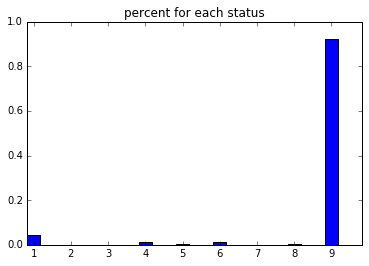

In [37]:
print data_with_secondary
count_current = 0;
count_chargeoff = 0;
count_fullypaid = 0;
count_late30 = 0;
count_late120 = 0;
count_grace = 0;
count_default = 0;
count_charged_policy = 0;
count_fully_policy = 0;

for val in data4["loan_status"]:
    if val == "Current":
        count_current += 1;
    if val == "Fully Paid":
        count_fullypaid += 1;
    if val == "Charged Off":
        count_chargeoff += 1;
    if val == "In Grace Period":
        count_grace += 1;
    if val == "Late (16-30 days)":
        count_late30 += 1;
    if val == "Late (31-120 days)":
        count_late120 += 1;
    if val == "Default":
        count_default += 1;
    if val == "Does not meet the credit policy. Status:Charged Off":
        count_charged_policy += 1;
    if val == "Does not meet the credit policy. Status:Fully Paid":
        count_fully_policy += 1;
print "pct for charged off:"
print count_chargeoff/(float(data_with_secondary))
pct = (count_fullypaid/(float(data_with_secondary)),
       count_fully_policy/(float(data_with_secondary)),
       count_charged_policy/(float(data_with_secondary)),
       count_grace/(float(data_with_secondary)),
       count_late30/(float(data_with_secondary)),
       count_late120/(float(data_with_secondary)),
       count_default/(float(data_with_secondary)),
       count_chargeoff/(float(data_with_secondary)),
       count_current/(float(data_with_secondary))) 
for i in pct:
    print i
width = 0.35
ind = np.arange(9)
fig,ax = plt.subplots()
rect = ax.bar(ind, pct, width, color='b')
ax.set_title('percent for each status')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))

In [89]:
pct_with_out_secondary = 1 - data_with_secondary / 1646801.0
print pct_with_out_secondary

0.986757962863


In [21]:
1-0.0089749763329

0.9910250236671

In [22]:
1-0.00371933220832

0.99628066779168